In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

In [39]:
#Load the dataframe

# Define the file path
file_path = "/Users/alanoudalturki/Desktop/TheImpactOfObesityOnSleepQuality.xlsx"

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Display sheet names
print("Sheet", excel_data.sheet_names)

# Load a specific sheet
df = excel_data.parse(excel_data.sheet_names[0])

# Display the first few rows
df

Sheet ['Data', 'Demographic_DescriptiveAnalysis', 'Bivariate ', 'Multivariate ']


,Timestamp,Result,AgreeToParticipate,Over18,Gender,Age,Nationality,Residence,MaritalStatus,EducationLevel,...,CoughSnoring,FeelCold,FeelHot,BadDreams,Pain,OtherReasons,SleepQuality,MedForSleep,DifficultyStayingAwake,MotivationProblem
0,2024-09-12 19:58:14.391,0,Yes,Yes,Female,26-34 years,Saudi,The Central Region (which includes the Riyadh ...,Married,Bachelor's degree,...,Not during the last month,Once or twice a week,Once or twice a week,Not during the last month,Once or twice a week,Not during the last month,Somewhat good,No problem at all,NaN,Acceptable
1,2024-09-12 20:14:13.522,0,Yes,Yes,Male,More than 46 years,Non-Saudi,The Central Region (which includes the Riyadh ...,Married,"Master's degree, Doctoral degree, or their equ...",...,Less than once a week,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Somewhat good,A bit of a problem,NaN,Very good
2,2024-09-12 20:17:17.448,0,Yes,Yes,Male,35-45 years,Saudi,The Western Region (which includes the provinc...,Single,"Master's degree, Doctoral degree, or their equ...",...,Not during the last month,Less than once a week,Once or twice a week,Not during the last month,Not during the last month,Not during the last month,Somewhat good,Just a very minor problem,NaN,Acceptable
3,2024-09-12 20:17:23.806,0,Yes,Yes,Female,26-34 years,Saudi,The Central Region (which includes the Riyadh ...,Married,"Master's degree, Doctoral degree, or their equ...",...,Not during the last month,Once or twice a week,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Somewhat bad,A bit of a problem,NaN,Acceptable
4,2024-09-12 20:52:28.519,0,Yes,Yes,Male,35-45 years,Saudi,The Central Region (which includes the Riyadh ...,Married,"Master's degree, Doctoral degree, or their equ...",...,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Very bad,A very big problem,NaN,Very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2024-12-25 01:00:44.752,0,Yes,Yes,Male,More than 46 years,Saudi,The Central Region (which includes the Riyadh ...,Married,Bachelor's degree,...,Less than once a week,Not during the last month,Not during the last month,Less than once a week,Less than once a week,Less than once a week,Somewhat good,Three times or more per week,Just a very minor problem,Acceptable
498,2024-12-25 09:54:24.338,0,Yes,Yes,Male,18-25 years,Saudi,The Central Region (which includes the Riyadh ...,Single,Bachelor's degree,...,Not during the last month,Not during the last month,Once or twice a week,Less than once a week,Once or twice a week,Not during the last month,Somewhat good,Not during the last month,No problem at all,Acceptable
499,2024-12-25 10:12:09.890,0,Yes,Yes,Male,35-45 years,Non-Saudi,The Western Region (which includes the provinc...,Married,Bachelor's degree,...,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Not during the last month,Somewhat good,Not during the last month,Just a very minor problem,Acceptable
500,2024-12-25 10:19:42.139,0,Yes,Yes,Male,35-45 years,Saudi,The Eastern Region (which includes the provinc...,Married,Bachelor's degree,...,Less than once a week,Not during the last month,Once or twice a week,Less than once a week,Not during the last month,Not during the last month,Somewhat good,Not during the last month,Just a very minor problem,Acceptable


In [40]:
# Print all column names in the DataFrame
print(df.columns)


Index(['Timestamp', 'Result', 'AgreeToParticipate', 'Over18', 'Gender', 'Age',
       'Nationality', 'Residence', 'MaritalStatus', 'EducationLevel',
       'CurrentlyWorking', 'Height', 'Weight', 'Smoker', 'Bedtime',
       'TimeToFallAsleep_Min', 'WakeUpTime', 'SleepHours',
       'UnableToFallAsleep', 'WakeUpMidnight', 'WakeUpBathroom',
       'BreathComfort', 'CoughSnoring', 'FeelCold', 'FeelHot', 'BadDreams',
       'Pain', 'OtherReasons', 'SleepQuality', 'MedForSleep',
       'DifficultyStayingAwake', 'MotivationProblem'],
      dtype='object')


In [41]:
pip install summarytools


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
#Print Dataframe summary
from summarytools import dfSummary
summary = dfSummary(df)
##Dataframe Summary## for complete dataframe#
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Timestamp[datetime64[ns]],Min: 2024-09-12Max: 2024-12-31Duration: 109 days,502 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAASlJREFUeJzt3F0KgkAYQNGKtteaxDW1QNtAPyB5M+ecV0Hm4frhCM55WZYTFC6/XgDjEBsZsZG5vrs4z/NtzU2nabqvWw5HZrKRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGReftHPP9vT6camGxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxpFZPLXFUVsmG5lDTLY9HXj3yT+t9dtMNjJiIyM2MmIjIzYyh9iNjmDtLnZPTDYyYiMjNjKbvLON/JWc14beIHgoWkPHttYRdoa/4J2NzAO6wSNHbPbDHQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Result[int64],1. 0,502 (100.0%),,0(0.0%)
3,AgreeToParticipate[object],1. Yes,502 (100.0%),,0(0.0%)
4,Over18[object],1. Yes,502 (100.0%),,0(0.0%)
5,Gender[object],1. Female2. Male,338 (67.3%)164 (32.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATtJREFUeJzt2zFqw0AURdE/QZi4mUEItBgvIovNImY3QmiK2LhRilQhTifeOC/3rOAbXwQ2emnf9wAUUkScI+LU+xD86r7v+7X3EUcYpml6yzmPvQ/BY621NaX07hDckHMeL5fLtZRy630Mvtu27bXWOi7LcoqIvx9bREQp5TbP80fvY/DQufcBR3npfQD+D2KDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SGiK+X9Hofgp/cvpehtbbWWscweknPSWttjYh77zuOwODl+dkMXhJTPqi4PdlsngKOrKZ8TrM3RzZTPrfZmyO3KR+/qJ8Yf+pChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhmbKZ/DZ3BnNeVzmr05YvACmU8KW2rfEFTOWQAAAABJRU5ErkJggg=="">",0(0.0%)
6,Age[object],1. 26-34 years2. 18-25 years3. 35-45 years4. More than 46 years,198 (39.4%)138 (27.5%)97 (19.3%)69 (13.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAetJREFUeJzt20Fq20AAheFREaHZSBiDD+ND9LA9hG5jjGfRhGzURZdJurLfZDLfd4Ix/MiM0Jv2fS+Q8KP1ARiH2IiZSinPpZSn1gcJe9v3/aX1IUYzH4/HX8uyHFofJKnWep2m6bfgsuZlWQ7n8/llXdfX1odJuN1uP7dtO1wul6dSitiC5lJKWdf19XQ6/Wl9mKDn1gcYkQsCMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREzl/Lvs5vWB0kZ6bd+NXOt9bpt26EM9NlNrfVaSnlrfY7R+CycmMmUjxQXBGJ6+xv199exrtZVVlF962ZdZRXVv97WVcO8nvmOXBCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEdPNlK+HM/J/XU35TPD6ZoNAjCkfMS2fbJ5Sg2m2rrKUGk+TdZWl1Jharqu+/O2X+/JSlxixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxTdZVllJjarauspQajw0CMdZVxDzqyeapxTsPWVdZTvGRu6+rLKf4zKPWVZZTvOOlLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZi7r6uspziMw9ZV1lO8REbBGKsq4hxQSDmL7NY2LmAz2PSAAAAAElFTkSuQmCC"">",0(0.0%)
7,Nationality[object],1. Saudi2. Non-Saudi,458 (91.2%)44 (8.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATlJREFUeJzt2zFqw0AURdE/QZi4mUEItBgtIovNImY3QmiK2LiZFKlT6Mt6xpp7esEvLgIbvVBrNUAhmNnVzC6vPgRv5VFrvW19qBuG4SvG2B9xEc6plLKEEL63BtfFGPtpmm4ppftRx+E81nX9zDn38zxfzGxbbGZmKaX7OI4/h1yHM7p6Hvp49hXAf4gNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJDpzP4+iHv1IXgPe1rpSilLzrk35wdxaE8pZTGzx9bnGLzAwzV4CUz5oLLnzeaqG+1yT/m8cy60yzXl2zPnQrv2TPn49YpN+FMXMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsi4pnxM/+DhnvJ551xoF4MXyPwCCltq3wo4ShMAAAAASUVORK5CYII="">",0(0.0%)
8,Residence[object],1. The Central Region (which incl2. The Western Region (which incl3. The Eastern Region (which incl4. The Southern Region (which inc5. The Northern Region (which inc,420 (83.7%)37 (7.4%)26 (5.2%)11 (2.2%)8 (1.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmtJREFUeJzt3UFu2mAUhdEHQmmZGCEklpEFsIgstotgAewDITwoaSZ00CRKO0ig4b+m9JxZRraUT7Zs+YrR8XgsSBgPfQL8P8RGjNiIGVXVtKruhj4RBvd0PB4PLQ8wWS

In [43]:
# Drop rows where 'Over18' column is 'nan' or 'No'
df = df[df['Over18'] != 'nan']  # Keeps only rows where Over18 is not 'nan'
df = df[df['Over18'] != 'No']  # Removes rows where Over18 is 'No'

# Check the resulting DataFrame
print(df.shape)  # Display the number of rows and columns
print(df['Over18'].value_counts())  # Verify the remaining unique values


(502, 32)
Over18
Yes    502
Name: count, dtype: int64


Mean Age: 32.34
Standard Deviation of Age: 9.42


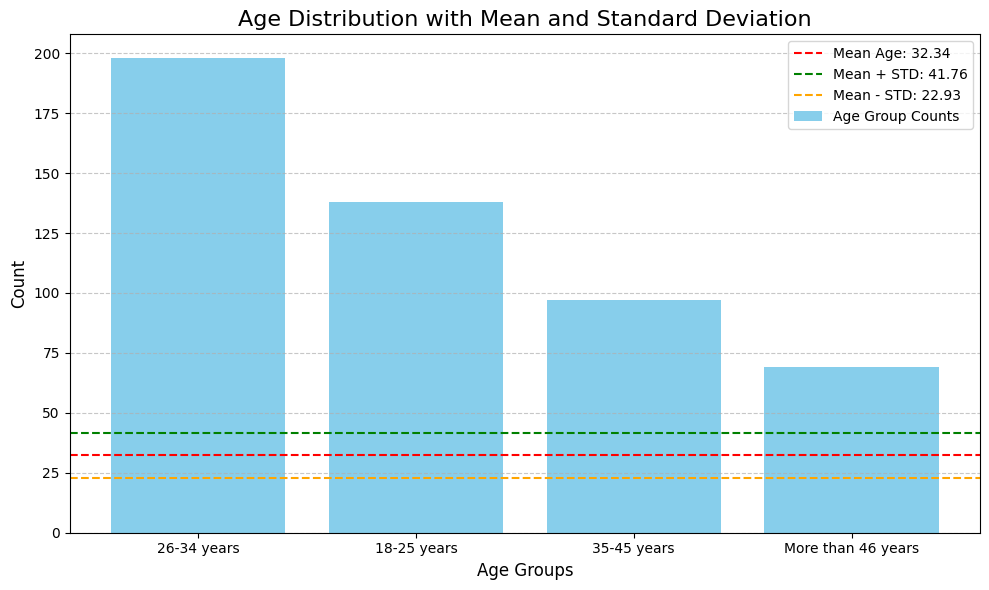

In [44]:
##Age Distribution with Mean and Standard Deviation

# Data: Counts and Percentages
data = {
    "Age Group": ["26-34 years", "18-25 years", "35-45 years", "More than 46 years"],
    "Count (n)": [198, 138, 97, 69],
    "Percentage (%)": [38.4, 26.8, 18.8, 13.4]
}

# Create a separate DataFrame for this analysis
age_df = pd.DataFrame(data)

# Map Age Ranges to Numeric Midpoints
age_mapping = {
    "26-34 years": 30,
    "18-25 years": 21.5,
    "35-45 years": 40,
    "More than 46 years": 50
}
age_df['Midpoint Age'] = age_df['Age Group'].map(age_mapping)

# Calculate Weighted Mean and Standard Deviation
mean_age = (age_df['Midpoint Age'] * age_df['Count (n)']).sum() / age_df['Count (n)'].sum()
std_age = (
    ((age_df['Midpoint Age'] - mean_age)**2 * age_df['Count (n)']).sum() / age_df['Count (n)'].sum()
)**0.5

# Print Results
print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")

# Plot Age Distribution
plt.figure(figsize=(10, 6))
plt.bar(age_df['Age Group'], age_df['Count (n)'], color='skyblue', label='Age Group Counts')

# Add mean and standard deviation lines
plt.axhline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_age + std_age, color='green', linestyle='--', label=f'Mean + STD: {mean_age + std_age:.2f}')
plt.axhline(mean_age - std_age, color='orange', linestyle='--', label=f'Mean - STD: {mean_age - std_age:.2f}')

# Customize Plot
plt.title("Age Distribution with Mean and Standard Deviation", fontsize=16)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.tight_layout()
plt.show()



In [45]:
print(df.columns.tolist())

['Timestamp', 'Result', 'AgreeToParticipate', 'Over18', 'Gender', 'Age', 'Nationality', 'Residence', 'MaritalStatus', 'EducationLevel', 'CurrentlyWorking', 'Height', 'Weight', 'Smoker', 'Bedtime', 'TimeToFallAsleep_Min', 'WakeUpTime', 'SleepHours', 'UnableToFallAsleep', 'WakeUpMidnight', 'WakeUpBathroom', 'BreathComfort', 'CoughSnoring', 'FeelCold', 'FeelHot', 'BadDreams', 'Pain', 'OtherReasons', 'SleepQuality', 'MedForSleep', 'DifficultyStayingAwake', 'MotivationProblem']


Mean BMI: 26.98
Standard Deviation of BMI: 5.80

BMI Summary Table:
  BMI Category  Frequency  Percentage (%)
0       Normal        192       39.024390
1   Overweight        179       36.382114
2        Obese        121       24.593496


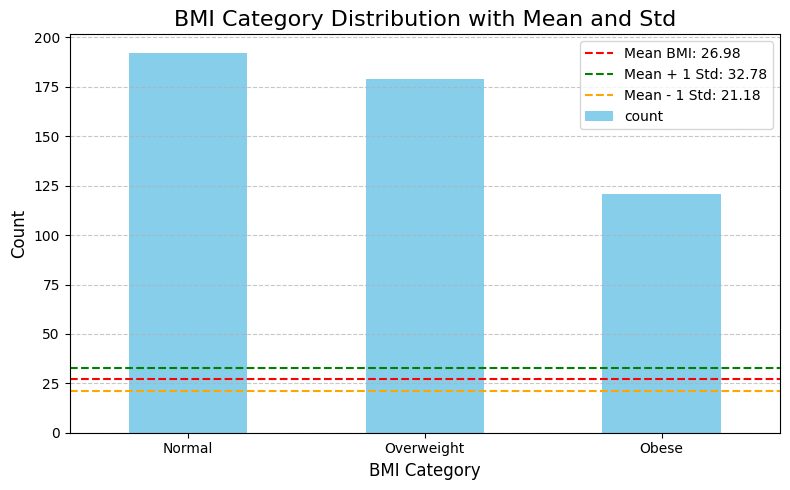

In [46]:
##BMI _BMI Category Distribution with Mean and Std"

# Step 1: Filter out unrealistic height and weight values
df = df[
    (df['Height'] >= 120) &
    (df['Height'] <= 250) &
    (df['Weight'] >= 30) &
    (df['Weight'] <= 200)
]

# Step 2: Convert Height to Meters and Recalculate BMI
df['Height_m'] = df['Height'] / 100  # Convert height from cm to meters
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)  # Correct BMI calculation using height in meters

# Step 3: Classify BMI Categories
def classify_bmi(bmi):
    if bmi <= 24.9:
        return "Normal"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obese"

df['BMI Category'] = df['BMI'].apply(classify_bmi)

# Step 4: Calculate Summary Statistics
mean_bmi = df['BMI'].mean()
std_bmi = df['BMI'].std()

# Step 5: Calculate Frequency and Percentage for BMI Categories
bmi_counts = df['BMI Category'].value_counts()
bmi_percentages = (bmi_counts / bmi_counts.sum()) * 100

# Create a table with BMI Category, Frequency, and Percentage
bmi_summary = pd.DataFrame({
    'BMI Category': bmi_counts.index,
    'Frequency': bmi_counts.values,
    'Percentage (%)': bmi_percentages.values
})

# Print Summary Statistics and BMI Table
print(f"Mean BMI: {mean_bmi:.2f}")
print(f"Standard Deviation of BMI: {std_bmi:.2f}")
print("\nBMI Summary Table:")
print(bmi_summary)

# Step 6: Plot BMI Categories
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bmi_counts.plot(kind='bar', color='skyblue')

# Add Mean and Std Lines
plt.axhline(mean_bmi, color='red', linestyle='--', label=f'Mean BMI: {mean_bmi:.2f}')
plt.axhline(mean_bmi + std_bmi, color='green', linestyle='--', label=f'Mean + 1 Std: {mean_bmi + std_bmi:.2f}')
plt.axhline(mean_bmi - std_bmi, color='orange', linestyle='--', label=f'Mean - 1 Std: {mean_bmi - std_bmi:.2f}')

# Customize Plot
plt.title("BMI Category Distribution with Mean and Std", fontsize=16)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)  # Rotate the x-axis labels to 0 degrees
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display Plot
plt.tight_layout()
plt.show()




In [47]:
print(df.columns.tolist())

['Timestamp', 'Result', 'AgreeToParticipate', 'Over18', 'Gender', 'Age', 'Nationality', 'Residence', 'MaritalStatus', 'EducationLevel', 'CurrentlyWorking', 'Height', 'Weight', 'Smoker', 'Bedtime', 'TimeToFallAsleep_Min', 'WakeUpTime', 'SleepHours', 'UnableToFallAsleep', 'WakeUpMidnight', 'WakeUpBathroom', 'BreathComfort', 'CoughSnoring', 'FeelCold', 'FeelHot', 'BadDreams', 'Pain', 'OtherReasons', 'SleepQuality', 'MedForSleep', 'DifficultyStayingAwake', 'MotivationProblem', 'Height_m', 'BMI', 'BMI Category']


In [48]:
import pandas as pd

# Ensure numeric columns are properly converted
df['TimeToFallAsleep_Min'] = pd.to_numeric(df['TimeToFallAsleep_Min'], errors='coerce')
df['SleepHours'] = pd.to_numeric(df['SleepHours'], errors='coerce')

# Function to calculate PSQI component scores
def calculate_psqi_scores(row):
    scores = {}

    # Component 1: Subjective Sleep Quality
    quality_mapping = {"Very good": 0, "Fairly good": 1, "Fairly bad": 2, "Very bad": 3}
    scores['SubjectiveSleepQuality'] = quality_mapping.get(row['SleepQuality'], 0)

    # Component 2: Sleep Latency
    latency_score = (0 if row['TimeToFallAsleep_Min'] <= 15 else
                     1 if row['TimeToFallAsleep_Min'] <= 30 else
                     2 if row['TimeToFallAsleep_Min'] <= 60 else 3)
    unable_to_sleep_score = (0 if row['UnableToFallAsleep'] == "Not during the past month" else
                             1 if row['UnableToFallAsleep'] == "Less than once a week" else
                             2 if row['UnableToFallAsleep'] == "Once or twice a week" else 3)
    scores['SleepLatency'] = min(3, latency_score + unable_to_sleep_score)

    # Component 3: Sleep Duration
    sleep_hours = row['SleepHours']
    scores['SleepDuration'] = (0 if sleep_hours > 7 else
                               1 if 6 <= sleep_hours <= 7 else
                               2 if 5 <= sleep_hours < 6 else 3)

    # Component 4: Habitual Sleep Efficiency
    bedtime = pd.to_datetime(row['Bedtime'], format='%H:%M', errors='coerce')
    wakeup_time = pd.to_datetime(row['WakeUpTime'], format='%H:%M', errors='coerce')
    time_in_bed = (wakeup_time - bedtime).seconds / 3600 if pd.notnull(bedtime) and pd.notnull(wakeup_time) else None
    habitual_sleep_efficiency = (row['SleepHours'] / time_in_bed) * 100 if time_in_bed else 0
    scores['HabitualSleepEfficiency'] = (0 if habitual_sleep_efficiency > 85 else
                                         1 if 75 <= habitual_sleep_efficiency <= 85 else
                                         2 if 65 <= habitual_sleep_efficiency < 75 else 3)

    # Component 5: Sleep Disturbances
    disturbances_questions = ['WakeUpMidnight', 'WakeUpBathroom', 'BreathComfort', 'CoughSnoring', 
                              'FeelCold', 'FeelHot', 'BadDreams', 'Pain', 'OtherReasons']
    disturbance_score = sum((0 if row[q] == "Not during the past month" else
                             1 if row[q] == "Less than once a week" else
                             2 if row[q] == "Once or twice a week" else 3) for q in disturbances_questions)
    scores['SleepDisturbances'] = (0 if disturbance_score == 0 else
                                   1 if disturbance_score <= 9 else
                                   2 if disturbance_score <= 18 else 3)

    # Component 6: Use of Sleeping Medication
    medication_mapping = {"Not during the past month": 0, "Less than once a week": 1, 
                          "Once or twice a week": 2, "Three or more times a week": 3}
    scores['UseOfSleepingMedication'] = medication_mapping.get(row['MedForSleep'], 0)

    # Component 7: Daytime Dysfunction
    staying_awake_score = (0 if row['DifficultyStayingAwake'] == "Never" else
                           1 if row['DifficultyStayingAwake'] == "Once or twice" else
                           2 if row['DifficultyStayingAwake'] == "Once or twice each week" else 3)
    motivation_problem_score = (0 if row['MotivationProblem'] == "No problem at all" else
                                 1 if row['MotivationProblem'] == "Only a very slight problem" else
                                 2 if row['MotivationProblem'] == "Somewhat of a problem" else 3)
    scores['DaytimeDysfunction'] = min(3, staying_awake_score + motivation_problem_score)

    # Global PSQI Score
    scores['GlobalPSQI'] = sum(scores.values())
    return scores

# Apply the scoring function to the DataFrame
psqi_scores = df.apply(calculate_psqi_scores, axis=1, result_type='expand')

# Combine the scores with the original DataFrame
result_df = pd.concat([df, psqi_scores], axis=1)

# Add interpretation column based on Global PSQI Score
def interpret_global_psqi(score):
    if score <= 4:
        return "Good sleep quality"
    elif 5 <= score <= 10:
        return "Mild to moderate sleep issues"
    else:
        return "Severe sleep problems"

result_df['SleepQualityInterpretation'] = result_df['GlobalPSQI'].apply(interpret_global_psqi)

# Save the scored dataset with interpretation
output_path = '/Users/alanoudalturki/Desktop/Scored_PSQI_Data_With_Interpretation.xlsx'
result_df.to_excel(output_path, index=False)

print(f"Scored data with interpretation saved to {output_path}")


Scored data with interpretation saved to /Users/alanoudalturki/Desktop/Scored_PSQI_Data_With_Interpretation.xlsx


In [49]:
result_df.head(3)

,Timestamp,Result,AgreeToParticipate,Over18,Gender,Age,Nationality,Residence,MaritalStatus,EducationLevel,...,BMI Category,SubjectiveSleepQuality,SleepLatency,SleepDuration,HabitualSleepEfficiency,SleepDisturbances,UseOfSleepingMedication,DaytimeDysfunction,GlobalPSQI,SleepQualityInterpretation
0,2024-09-12 19:58:14.391,0,Yes,Yes,Female,26-34 years,Saudi,The Central Region (which includes the Riyadh ...,Married,Bachelor's degree,...,Obese,0,3,1,3,3,0,3,13,Severe sleep problems
1,2024-09-12 20:14:13.522,0,Yes,Yes,Male,More than 46 years,Non-Saudi,The Central Region (which includes the Riyadh ...,Married,"Master's degree, Doctoral degree, or their equ...",...,Overweight,0,3,1,3,3,0,3,13,Severe sleep problems
2,2024-09-12 20:17:17.448,0,Yes,Yes,Male,35-45 years,Saudi,The Western Region (which includes the provinc...,Single,"Master's degree, Doctoral degree, or their equ...",...,Overweight,0,3,1,3,3,0,3,13,Severe sleep problems


In [50]:
#Descriptive Statistics

# Descriptive statistics for all scores
descriptive_stats = result_df[['SubjectiveSleepQuality', 'SleepLatency', 'SleepDuration',
                               'HabitualSleepEfficiency', 'SleepDisturbances',
                               'UseOfSleepingMedication', 'DaytimeDysfunction', 'GlobalPSQI']].describe()

print("Descriptive Statistics:")
descriptive_stats


Descriptive Statistics:


,SubjectiveSleepQuality,SleepLatency,SleepDuration,HabitualSleepEfficiency,SleepDisturbances,UseOfSleepingMedication,DaytimeDysfunction,GlobalPSQI
count,492.000000,492.000000,492.000000,492.0,492.000000,492.000000,492.0,492.000000
mean,0.359756,2.680894,1.048780,3.0,2.835366,0.168699,3.0,13.093496
std,0.975591,0.620263,0.927987,0.0,0.382043,0.471160,0.0,1.748843
min,0.000000,1.000000,0.000000,3.0,1.000000,0.000000,3.0,9.000000
25%,0.000000,3.000000,0.000000,3.0,3.000000,0.000000,3.0,12.000000
50%,0.000000,3.000000,1.000000,3.0,3.000000,0.000000,3.0,13.000000
75%,0.000000,3.000000,1.000000,3.0,3.000000,0.000000,3.0,14.000000
max,3.000000,3.000000,3.000000,3.0,3.000000,2.000000,3.0,19.000000


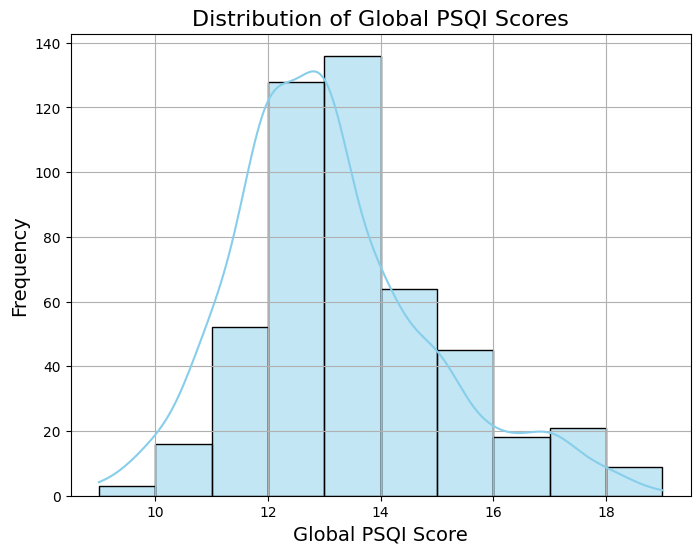

In [51]:
#Distribution of Global PSQI Scores
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Global PSQI scores
plt.figure(figsize=(8, 6))
sns.histplot(result_df['GlobalPSQI'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Global PSQI Scores', fontsize=16)
plt.xlabel('Global PSQI Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


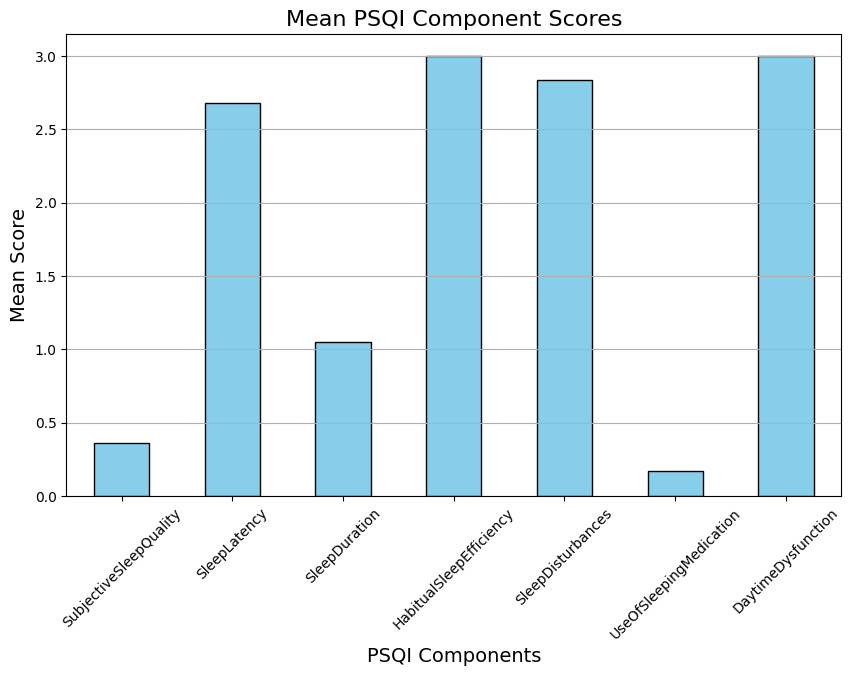

In [52]:
#Bar Plot for Mean Component Scores
# Calculate mean scores for each component
mean_scores = result_df[['SubjectiveSleepQuality', 'SleepLatency', 'SleepDuration',
                         'HabitualSleepEfficiency', 'SleepDisturbances',
                         'UseOfSleepingMedication', 'DaytimeDysfunction']].mean()

# Bar plot of mean scores
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean PSQI Component Scores', fontsize=16)
plt.xlabel('PSQI Components', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


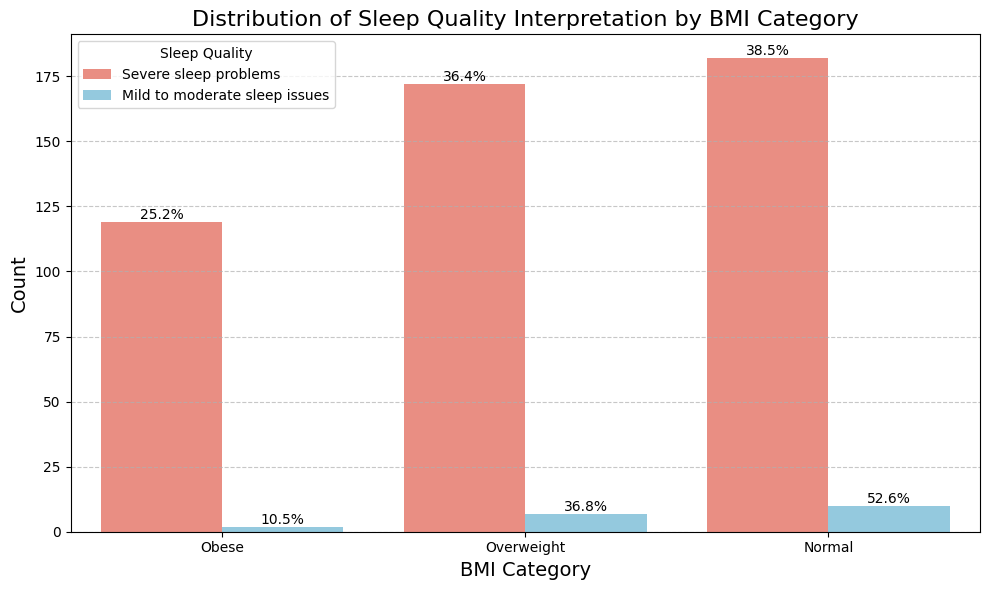

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom palette for the plot
custom_palette = {
    'Good sleep quality': 'skyblue',
    'Mild to moderate sleep issues': 'skyblue',
    'Severe sleep problems': 'salmon'
}

# Use the exact column name: 'BMI Category'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=result_df, x='BMI Category', hue='SleepQualityInterpretation', palette=custom_palette)

# Add percentage labels to the bars
for container in ax.containers:
    total = sum([bar.get_height() for bar in container])  # Total for percentage calculation
    for bar in container:
        height = bar.get_height()
        percentage = (height / total) * 100 if total > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{percentage:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Add labels, title, and legend
plt.title('Distribution of Sleep Quality Interpretation by BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sleep Quality', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
print(result_df.columns)

Index(['Timestamp', 'Result', 'AgreeToParticipate', 'Over18', 'Gender', 'Age',
       'Nationality', 'Residence', 'MaritalStatus', 'EducationLevel',
       'CurrentlyWorking', 'Height', 'Weight', 'Smoker', 'Bedtime',
       'TimeToFallAsleep_Min', 'WakeUpTime', 'SleepHours',
       'UnableToFallAsleep', 'WakeUpMidnight', 'WakeUpBathroom',
       'BreathComfort', 'CoughSnoring', 'FeelCold', 'FeelHot', 'BadDreams',
       'Pain', 'OtherReasons', 'SleepQuality', 'MedForSleep',
       'DifficultyStayingAwake', 'MotivationProblem', 'Height_m', 'BMI',
       'BMI Category', 'SubjectiveSleepQuality', 'SleepLatency',
       'SleepDuration', 'HabitualSleepEfficiency', 'SleepDisturbances',
       'UseOfSleepingMedication', 'DaytimeDysfunction', 'GlobalPSQI',
       'SleepQualityInterpretation'],
      dtype='object')


In [54]:
# Add interpretation of sleep quality direction
def interpret_effect(coef):
    if coef > 0:
        return "Better sleep"
    elif coef < 0:
        return "Worse sleep"
    else:
        return "No effect"

results_df['SleepEffect'] = results_df['Coefficient'].apply(interpret_effect)


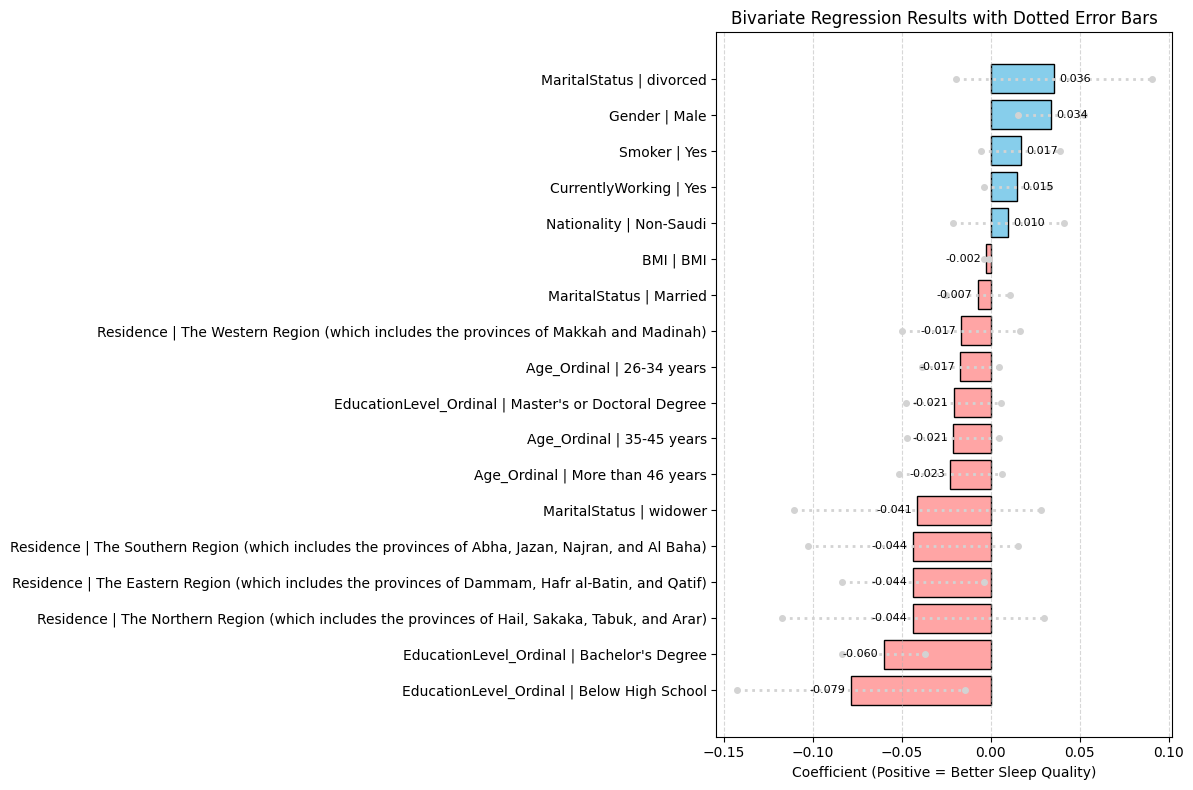

Bivariate Regression Results:


,Variable,Level,Coefficient,StdError,p-value,SleepEffect
5,EducationLevel_Ordinal,Below High School,-0.078652,0.063970,0.219473,Worse sleep
3,EducationLevel_Ordinal,Bachelor's Degree,-0.060269,0.023422,0.010371,Worse sleep
10,Residence,The Northern Region (which includes the provin...,-0.043689,0.073658,0.553365,Worse sleep
9,Residence,The Eastern Region (which includes the provinc...,-0.043689,0.039805,0.272924,Worse sleep
11,Residence,The Southern Region (which includes the provin...,-0.043689,0.059039,0.459649,Worse sleep
15,MaritalStatus,widower,-0.041353,0.069353,0.551267,Worse sleep
2,Age_Ordinal,More than 46 years,-0.022781,0.028955,0.431793,Worse sleep
1,Age_Ordinal,35-45 years,-0.021053,0.025962,0.417824,Worse sleep
4,EducationLevel_Ordinal,Master's or Doctoral Degree,-0.020800,0.026784,0.437771,Worse sleep
0,Age_Ordinal,26-34 years,-0.017099,0.021690,0.430898,Worse sleep


In [124]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Ordinal variables mapping
ordinal_variables = {
    'Age_Ordinal': {
        1: '18-25 years',
        2: '26-34 years',
        3: '35-45 years',
        4: 'More than 46 years'
    },
    'EducationLevel_Ordinal': {
        1: 'Below High School',
        2: 'High School or Diploma',
        3: "Bachelor's Degree",
        4: "Master's or Doctoral Degree"
    },
    'BMI': None
}

# Categorical variables with default reference
categorical_vars = ['Gender', 'Nationality', 'Residence', 'MaritalStatus', 'CurrentlyWorking', 'Smoker']

bivariate_results = []

# Bivariate regression for ordinal variables
for ordinal_var, labels_dict in ordinal_variables.items():
    formula = f'SleepQualityNumeric ~ C({ordinal_var})' if labels_dict else f'SleepQualityNumeric ~ {ordinal_var}'
    model = smf.ols(formula, data=result_df).fit()

    for param in model.params.index:
        if param == 'Intercept':
            continue
        coef = model.params[param]
        se = model.bse[param]
        pval = model.pvalues[param]

        if labels_dict:
            level_num = int(param.split('[')[-1].replace('T.', '').replace(']', ''))
            level_label = labels_dict.get(level_num, f'Level {level_num}')
        else:
            level_label = ordinal_var

        bivariate_results.append({
            'Variable': ordinal_var,
            'Level': level_label,
            'Coefficient': coef,
            'StdError': se,
            'p-value': pval,
            'SleepEffect': 'Better sleep' if coef > 0 else 'Worse sleep'
        })

# Bivariate regression for categorical variables
for cat_var in categorical_vars:
    formula = f'SleepQualityNumeric ~ C({cat_var})'
    model = smf.ols(formula, data=result_df).fit()

    for param in model.params.index:
        if param == 'Intercept':
            continue
        coef = model.params[param]
        se = model.bse[param]
        pval = model.pvalues[param]
        level = param.split('T.')[1].replace(']', '')

        bivariate_results.append({
            'Variable': cat_var,
            'Level': level,
            'Coefficient': coef,
            'StdError': se,
            'p-value': pval,
            'SleepEffect': 'Better sleep' if coef > 0 else 'Worse sleep'
        })

# Convert to DataFrame
biv_df = pd.DataFrame(bivariate_results)

# Sort data by coefficients
biv_df_sorted = biv_df.sort_values('Coefficient')

# Define colors (positive=blue, negative=transparent red)
colors = biv_df_sorted['Coefficient'].apply(
    lambda x: 'skyblue' if x >= 0 else (1, 0.3, 0.3, 0.5)
)

# Create the plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    biv_df_sorted['Variable'] + " | " + biv_df_sorted['Level'],
    biv_df_sorted['Coefficient'],
    color=colors,
    edgecolor='black',
)

# Adding error bars manually with dotted style
for index, bar in enumerate(bars):
    coef = bar.get_width()
    stderr = biv_df_sorted['StdError'].iloc[index]
    plt.plot([coef - stderr, coef + stderr], 
             [bar.get_y() + bar.get_height() / 2]*2,
             color='lightgray', linestyle=':', linewidth=2.0, marker='o', markersize=4)

# Adding clear bar labels
for bar in bars:
    width = bar.get_width()
    xpos = width + (0.003 if width >= 0 else -0.003)
    align = 'left' if width >= 0 else 'right'
    plt.text(xpos, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', ha=align, fontsize=8, color='black')

# Labels and title
plt.xlabel('Coefficient (Positive = Better Sleep Quality)')
plt.title('Bivariate Regression Results with Dotted Error Bars')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Display results table
print("Bivariate Regression Results:")
display(biv_df_sorted)


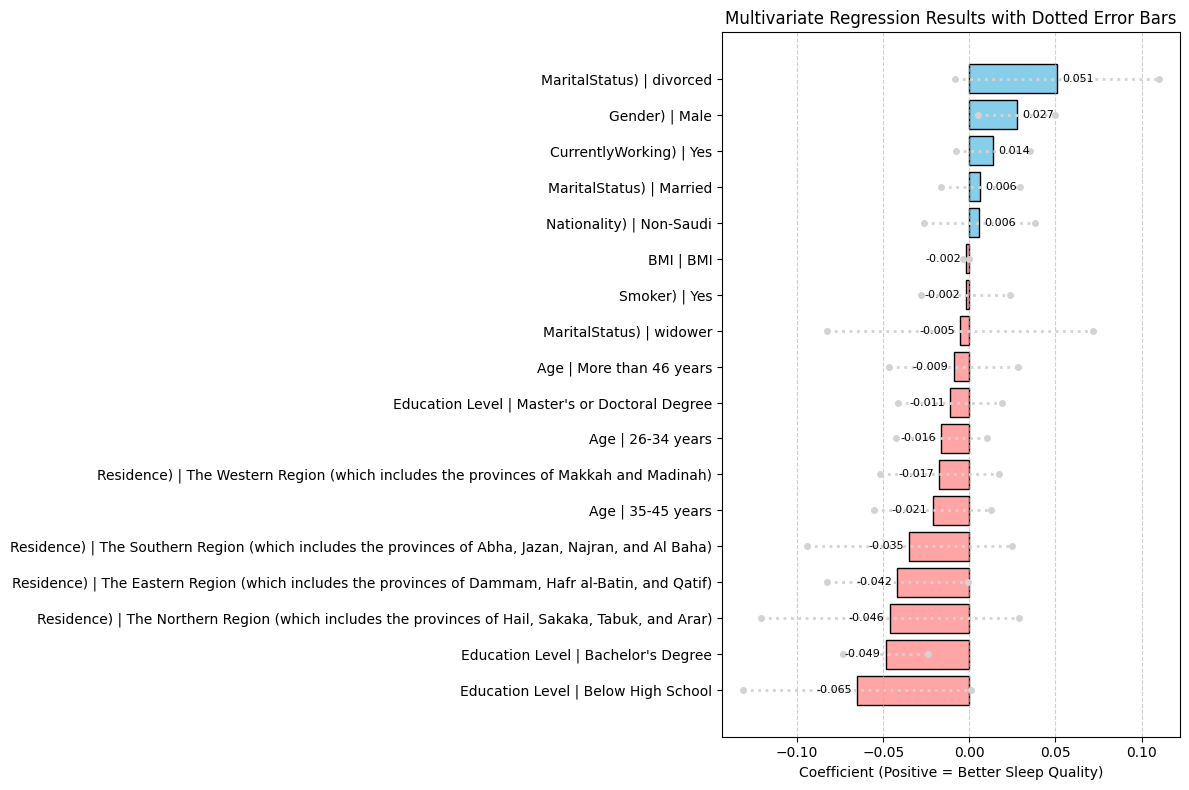

 Multivariate Regression Results:


,Variable,Level,Coefficient,StdError,p-value,SleepEffect
5,Education Level,Below High School,-0.065188,0.066399,0.326717,Worse sleep
3,Education Level,Bachelor's Degree,-0.048612,0.024663,0.049304,Worse sleep
9,Residence),The Northern Region (which includes the provin...,-0.046252,0.074828,0.536797,Worse sleep
8,Residence),The Eastern Region (which includes the provinc...,-0.041710,0.040745,0.306510,Worse sleep
10,Residence),The Southern Region (which includes the provin...,-0.034778,0.059505,0.559189,Worse sleep
1,Age,35-45 years,-0.021350,0.033852,0.528552,Worse sleep
11,Residence),The Western Region (which includes the provinc...,-0.017470,0.034458,0.612398,Worse sleep
0,Age,26-34 years,-0.016254,0.026361,0.537804,Worse sleep
4,Education Level,Master's or Doctoral Degree,-0.011297,0.030063,0.707255,Worse sleep
2,Age,More than 46 years,-0.009147,0.037653,0.808170,Worse sleep


In [126]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define mappings again clearly
age_labels = {1: '18-25 years', 2: '26-34 years', 3: '35-45 years', 4: 'More than 46 years'}
education_labels = {1: 'Below High School', 2: 'High School or Diploma', 3: "Bachelor's Degree", 4: "Master's or Doctoral Degree"}

# Prepare formula clearly specifying ordinal variables without explicit reference
formula = ('SleepQualityNumeric ~ C(Age_Ordinal) + C(EducationLevel_Ordinal) + '
           'C(Gender) + C(Nationality) + C(Residence) + C(MaritalStatus) + '
           'C(CurrentlyWorking) + C(Smoker) + BMI')

multi_model = smf.ols(formula, data=result_df).fit()

multi_results = []

for param in multi_model.params.index:
    if param == 'Intercept':
        continue
    coef = multi_model.params[param]
    se = multi_model.bse[param]
    pval = multi_model.pvalues[param]

    if 'Age_Ordinal' in param:
        level_num = int(param.split('T.')[-1][:-1])
        variable, level_label = 'Age', age_labels[level_num]
    elif 'EducationLevel_Ordinal' in param:
        level_num = int(param.split('T.')[-1][:-1])
        variable, level_label = 'Education Level', education_labels[level_num]
    elif 'C(' in param:
        variable, level_label = param.split('[')[0][2:], param.split('T.')[-1][:-1]
    else:
        variable, level_label = 'BMI', 'BMI'

    multi_results.append({
        'Variable': variable,
        'Level': level_label,
        'Coefficient': coef,
        'StdError': se,
        'p-value': pval,
        'SleepEffect': 'Better sleep' if coef > 0 else 'Worse sleep'
    })

multi_df = pd.DataFrame(multi_results)

import matplotlib.pyplot as plt

# Sort multivariate results by coefficient
multi_df_sorted = multi_df.sort_values('Coefficient')

# Define bar colors clearly: blue for positive, transparent red for negative
colors = multi_df_sorted['Coefficient'].apply(
    lambda x: 'skyblue' if x >= 0 else (1, 0.3, 0.3, 0.5)
)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    multi_df_sorted['Variable'] + " | " + multi_df_sorted['Level'],
    multi_df_sorted['Coefficient'],
    color=colors,
    edgecolor='black'
)

# Add clearly marked dotted error bars manually
for index, bar in enumerate(bars):
    coef = bar.get_width()
    stderr = multi_df_sorted['StdError'].iloc[index]
    plt.plot(
        [coef - stderr, coef + stderr],
        [bar.get_y() + bar.get_height() / 2] * 2,
        color='lightgray', linestyle=':', linewidth=2.0, marker='o', markersize=4
    )

# Add coefficient labels neatly at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.003 if width > 0 else -0.003), 
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             va='center',
             ha='left' if width > 0 else 'right', 
             fontsize=8, color='black')

# Labels and title
plt.xlabel('Coefficient (Positive = Better Sleep Quality)')
plt.title('Multivariate Regression Results with Dotted Error Bars')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Display results table clearly
print(" Multivariate Regression Results:")
display(multi_df_sorted)


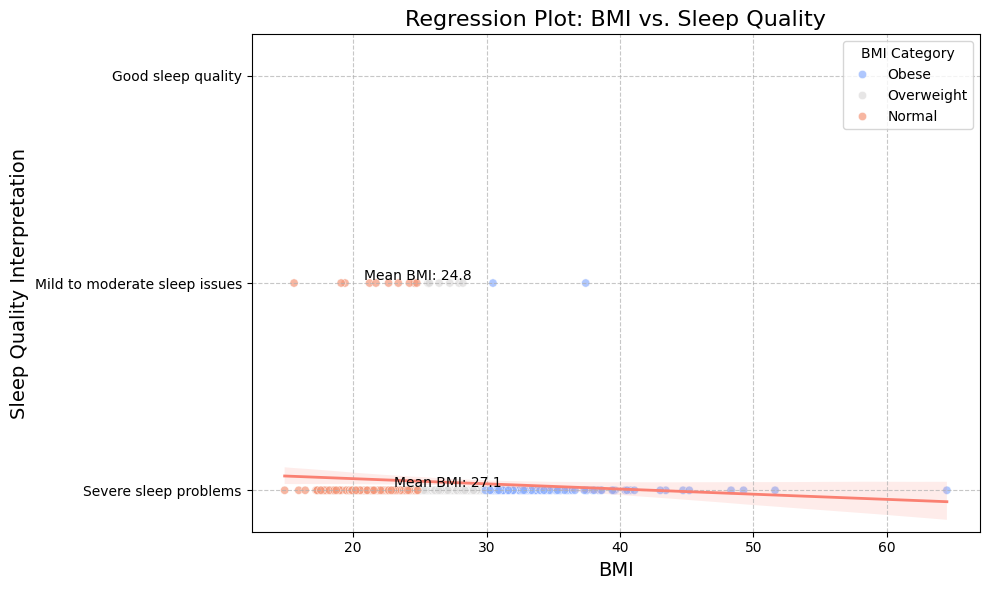

In [60]:
# Create scatter plot with regression line for BMI vs. SleepQualityNumeric
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=result_df, x='BMI', y='SleepQualityNumeric', hue='BMI Category', palette='coolwarm', alpha=0.7)

# Regression plot with lighter line and confidence interval
sns.regplot(data=result_df, x='BMI', y='SleepQualityNumeric', scatter=False, 
            ci=95, color='lightcoral', line_kws={'color': 'salmon', 'lw': 2}, 
            scatter_kws={'alpha': 0.7})


# Set custom y-axis ticks and labels
plt.yticks(
    [1, 2, 3],  # Numeric values
    ['Severe sleep problems', 'Mild to moderate sleep issues', 'Good sleep quality']  # Labels
)

# Adjust y-axis limits to give space for labels
plt.ylim(0.8, 3.2)

# Add titles and labels
plt.title('Regression Plot: BMI vs. Sleep Quality', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Sleep Quality Interpretation', fontsize=14)
plt.legend(title='BMI Category', fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate average BMI for each Sleep Quality level
avg_bmi_per_quality = result_df.groupby('SleepQualityNumeric')['BMI'].mean()
for quality, avg_bmi in avg_bmi_per_quality.items():
    plt.text(avg_bmi, quality, f"Mean BMI: {avg_bmi:.1f}", color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [127]:
import statsmodels.formula.api as smf

# Fit the model (replace with your actual formula and dataframe)
model = smf.ols('SleepQualityNumeric ~ Age_Ordinal + EducationLevel_Ordinal + Gender + Nationality + Residence + MaritalStatus + CurrentlyWorking + Smoker + BMI', data=result_df).fit()

# Print summary of the model
print(model.summary())

# Extract key metrics
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_stat = model.fvalue
f_pval = model.f_pvalue
rmse = (model.resid ** 2).mean() ** 0.5  # Root Mean Squared Error

# Display results
print("\nModel Fit and Performance:")
print(f"R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adj_r_squared:.3f}")
print(f"F-statistic: {f_stat:.2f} (p = {f_pval:.3g})")
print(f"RMSE: {rmse:.3f}")


                             OLS Regression Results                            
Dep. Variable:     SleepQualityNumeric   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                 -0.004
Method:                  Least Squares   F-statistic:                    0.8824
Date:                 Sun, 20 Apr 2025   Prob (F-statistic):              0.601
Time:                         10:23:23   Log-Likelihood:                 120.19
No. Observations:                  492   AIC:                            -202.4
Df Residuals:                      473   BIC:                            -122.6
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------